<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot(상자 그림)

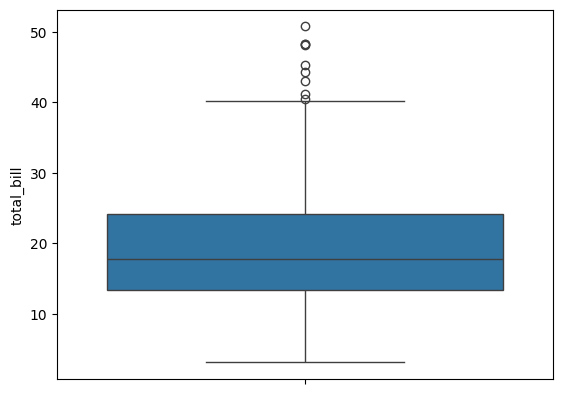

In [4]:
sns.boxplot(data=tips, y='total_bill')
plt.show()

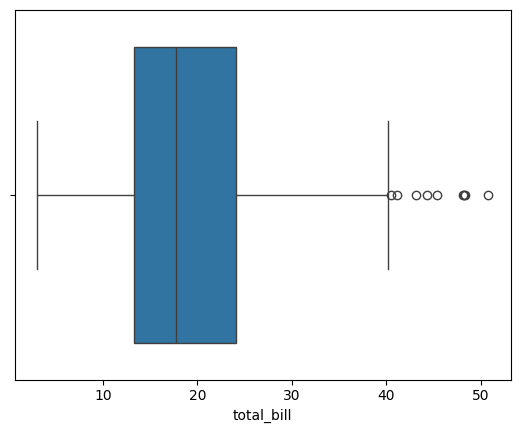

In [5]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

성별 tip의 box plot

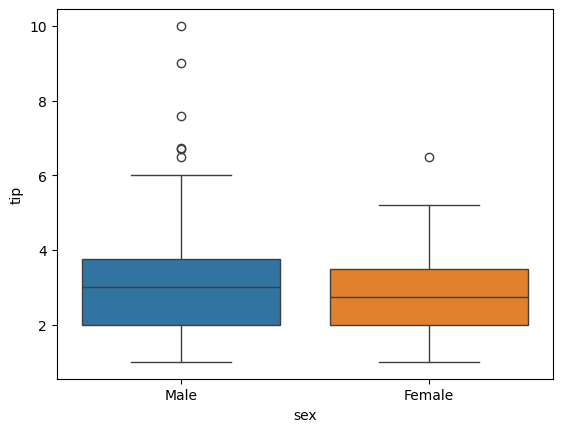

In [9]:
sns.boxplot(data=tips, x='sex', y='tip', hue='sex')
plt.show()

In [7]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [8]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


요일별 tip의 box plot

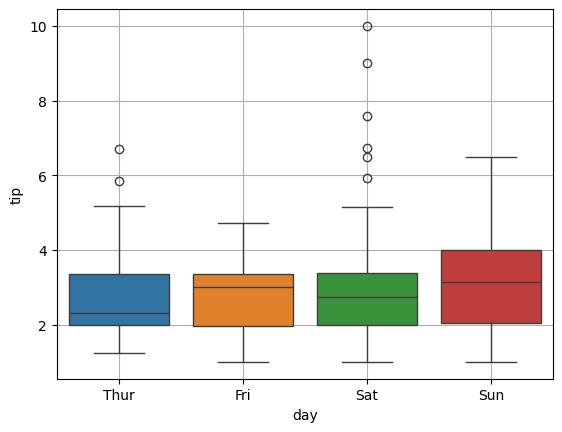

In [12]:
sns.boxplot(data=tips, x='day', y='tip', hue='day')

plt.grid()
plt.show()

subplot(nrows=1, ncols=2)을 생성하고, 흡연여부별 tip의 box plot과 시간별 tip의 box plot

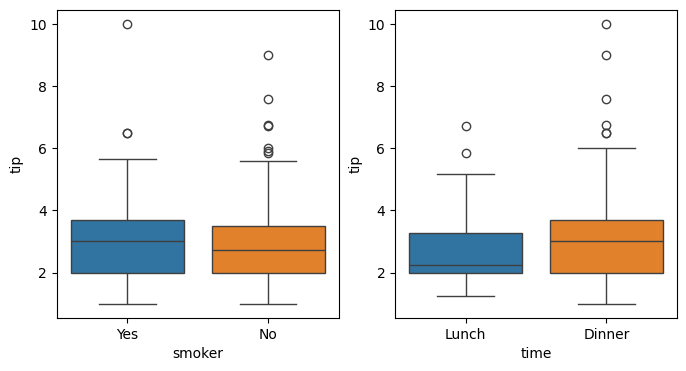

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(data=tips, x='smoker', y='tip', hue='smoker', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', hue='time', ax=axes[1])

plt.show()

# Histogram

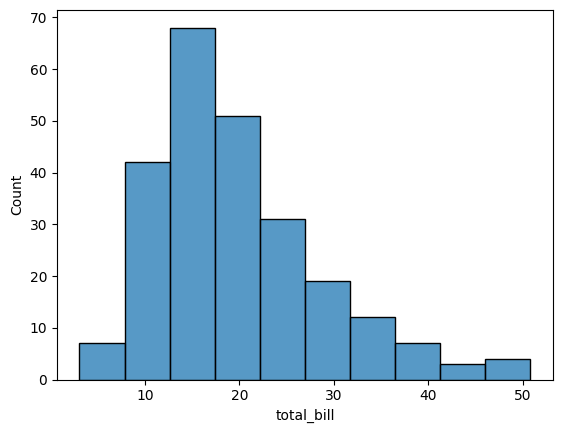

In [20]:
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

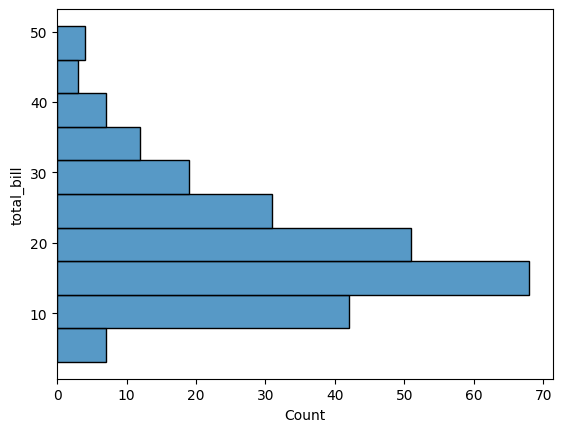

In [22]:
sns.histplot(data=tips, y='total_bill', bins=10)
plt.show()

subplot(nrows=2, ncols=1) 2개 생성, 위쪽 subplot에는 tip의 box plot을 가로로 표현, 아래쪽 subplot에는 tip의 histogram 표현.

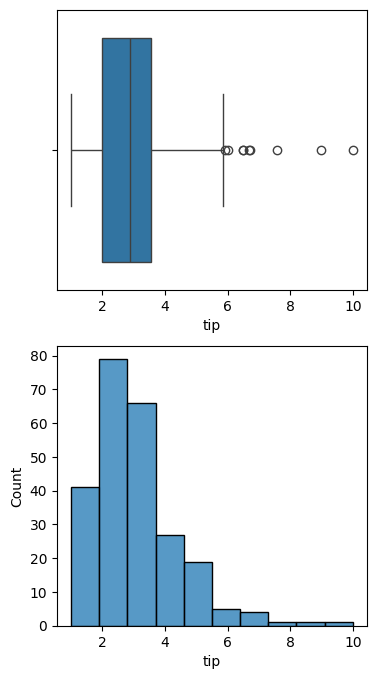

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 8))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', ax=axes[1], bins=10)

plt.show()

# 막대 그래프(Bar plot)

## `countplot()`

카테고리(범주) 타입 변수의 빈도수를 막대로 표현한 그래프

성별 빈도수 세로 막대 그래프

In [58]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


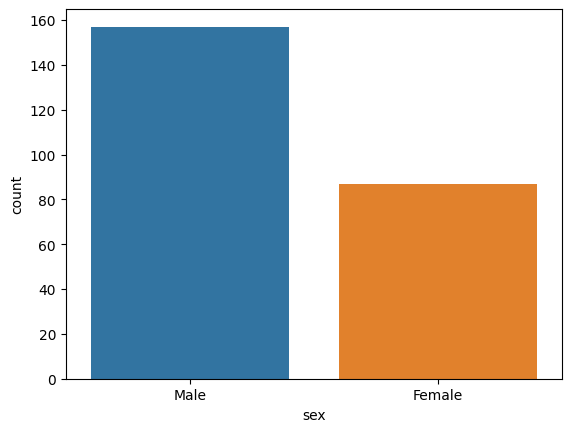

In [29]:
sns.countplot(data=tips, x='sex', hue='sex')
plt.show()

성별 빈도수 가로 막대 그래프

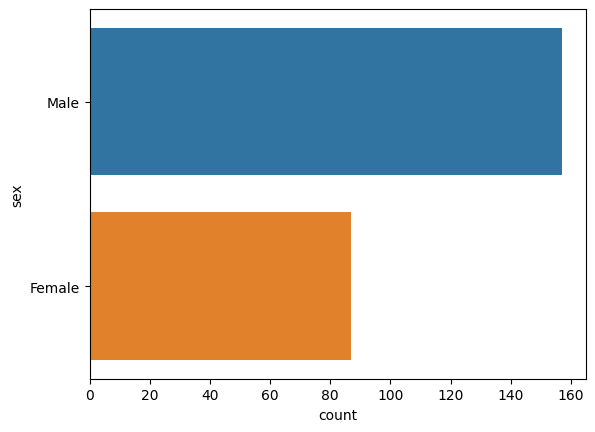

In [30]:
sns.countplot(data=tips, y='sex', hue='sex')
plt.show()

성별로 다른 색깔을 사용해서, 요일별 성별 빈도수 그래프

In [68]:
# days = tips.day.unique()
days = tips.day.cat.categories
genders = tips.sex.cat.categories
for d in days:
    subset_df = tips[tips.day == d]
    print(d)
    print(subset_df.sex.value_counts())

Thur
sex
Female    32
Male      30
Name: count, dtype: int64
Fri
sex
Male      10
Female     9
Name: count, dtype: int64
Sat
sex
Male      59
Female    28
Name: count, dtype: int64
Sun
sex
Male      58
Female    18
Name: count, dtype: int64


In [71]:
tips.groupby(by=['day', 'sex'], observed=True).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

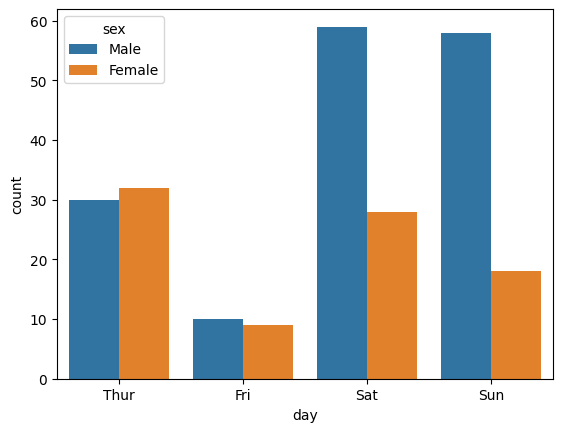

In [31]:
sns.countplot(data=tips, x='day', hue='sex')
plt.show()

흡연/비흡연별로 다른 색깔을 사용해서, 성별 흡연여부별 빈도수 그래프

In [73]:
genders = tips.sex.cat.categories
for g in genders:
    subset_df = tips[tips.sex == g]
    print(g)
    print(subset_df.smoker.value_counts())

Male
smoker
No     97
Yes    60
Name: count, dtype: int64
Female
smoker
No     54
Yes    33
Name: count, dtype: int64


In [75]:
tips.groupby(by=['sex', 'smoker'], observed=True).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

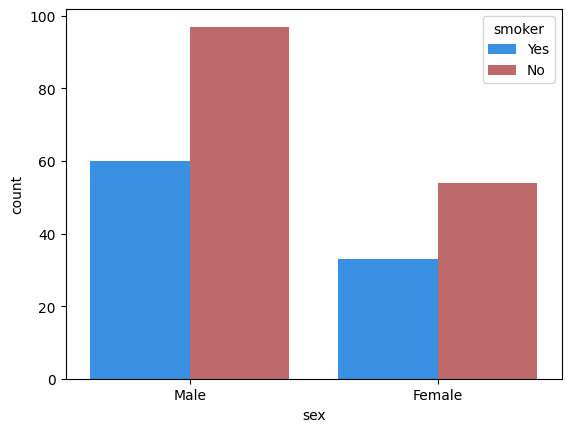

In [33]:
sns.countplot(data=tips, x='sex', hue='smoker', palette=['DodgerBlue', 'IndianRed'])
plt.show()

## `barplot()`

*   그룹별 변수의 기술 통계량(예: 평균, 최댓값, 최솟값, ...)을 막대로 시각화
*   카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화

성별 팁의 평균을 막대 그래프로 표현

In [34]:
print(tips[tips.sex == 'Male'].tip.mean())
print(tips[tips.sex == 'Female'].tip.mean())

3.0896178343949043
2.8334482758620685


In [77]:
tips.groupby(by=['sex'], observed=True).tip.mean()

,tip
sex,
Male,3.089618
Female,2.833448


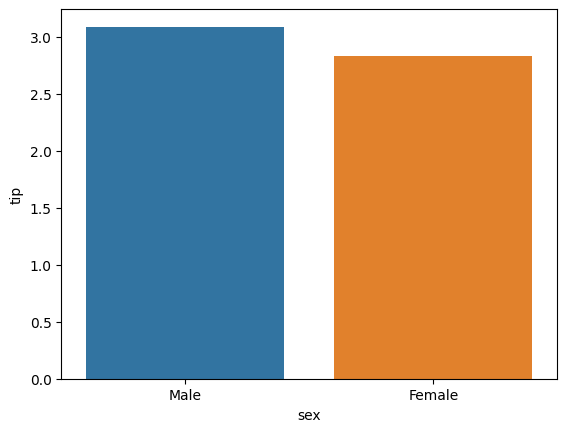

In [39]:
sns.barplot(data=tips, x='sex', y='tip', estimator='mean', errorbar=None, hue='sex')
# estimator 파라미터의 기본값은 'mean'. 평균을 막대로 표현할 경우 estimator 값은 생략 가능.
plt.show()

성별 팁의 최댓값을 막대 그래프로 표현

In [41]:
print(tips[tips.sex == 'Male'].tip.max())
print(tips[tips.sex == 'Female'].tip.max())

10.0
6.5


In [78]:
tips.groupby(by=['sex'], observed=True).tip.max()

,tip
sex,
Male,10.0
Female,6.5


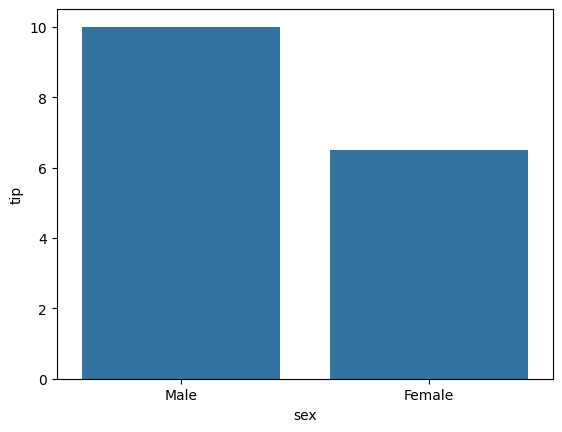

In [43]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)
plt.show()

요일별 팁의 평균을 가로 막대 그래프로 표현

In [79]:
tips.groupby(by=['day'], observed=True).tip.mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


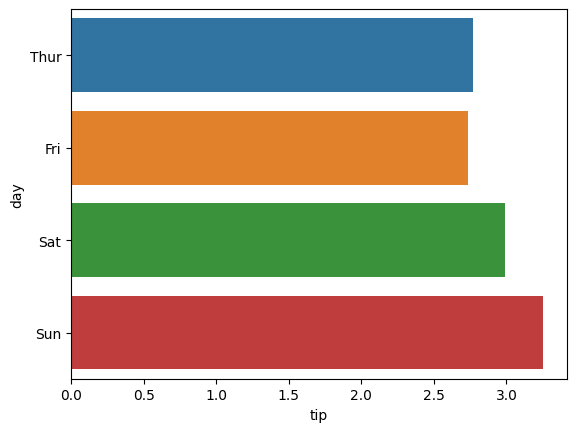

In [47]:
sns.barplot(data=tips, x='tip', y='day', estimator='mean', errorbar=None, hue='day')
plt.show()

요일별 성별 팁의 평균을 세로 막대 그래프로 표현, 성별로 막대 색깔을 다르게 표현.

In [81]:
tips.groupby(by=['day', 'sex'], observed=True).tip.mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

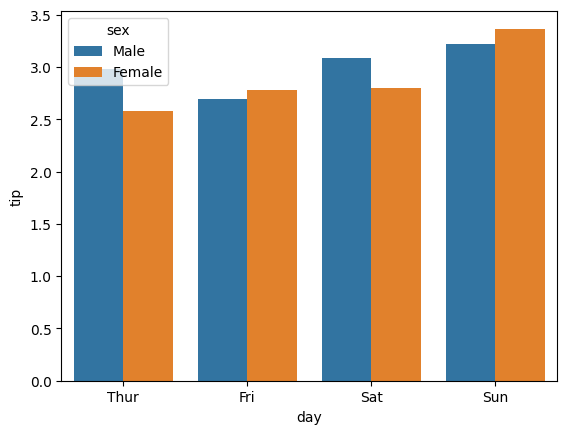

In [46]:
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)
plt.show()

In [83]:
tips.groupby(by=['sex', 'day'], observed=True).tip.mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

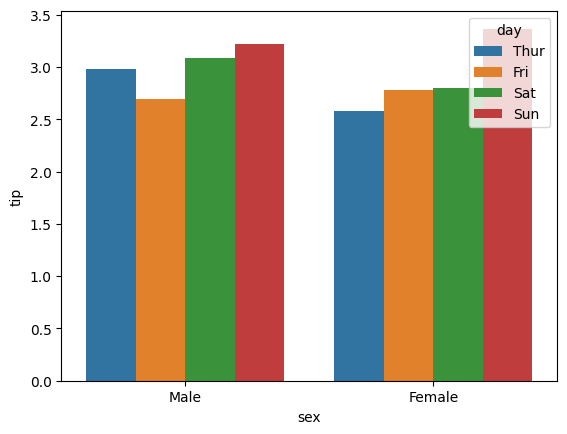

In [48]:
sns.barplot(data=tips, x='sex', y='tip', hue='day', errorbar=None)
plt.show()

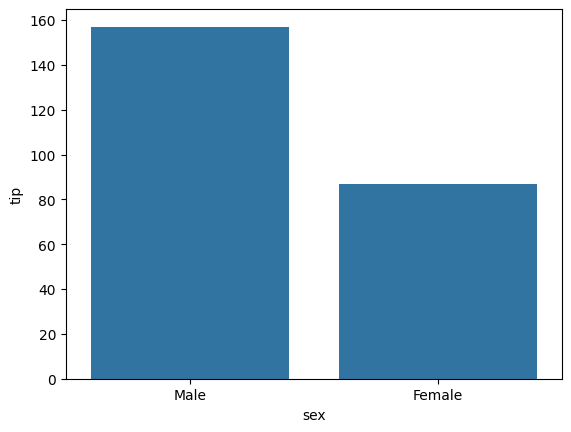

In [84]:
# barplot() 함수를 사용한 빈도수
sns.barplot(data=tips, x='sex', y='tip', estimator='size', errorbar=None)
plt.show()

# Scatter Plot(산점도)

## `scatterplot()`

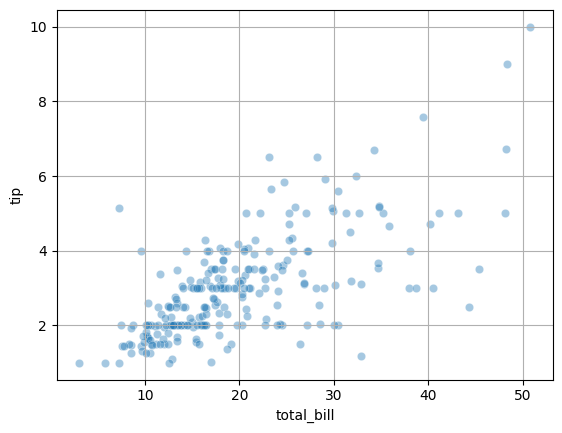

In [51]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.4)
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀 직선

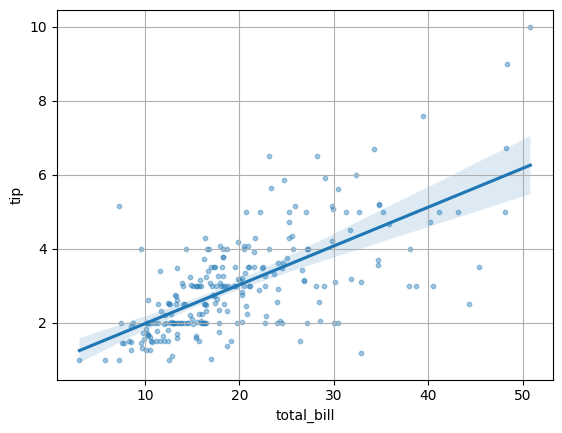

In [56]:
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'s': 10, 'alpha': 0.4})
# scatter_kws: scatterplot 함수의 키워드 아규먼트 설정. scatterplot() 함수의 파라미터들을 dict 타입 객체로 전달.
plt.grid()
plt.show()

## `jointplot()`

산점도 + 히스토그램

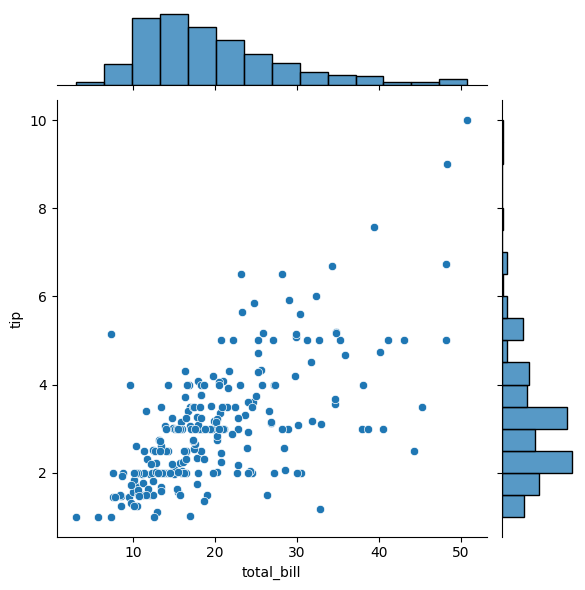

In [57]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

연습문제 1. tip ~ total_bill 산점도. marker의 색깔을 성별에 따라 다르게 시각화.

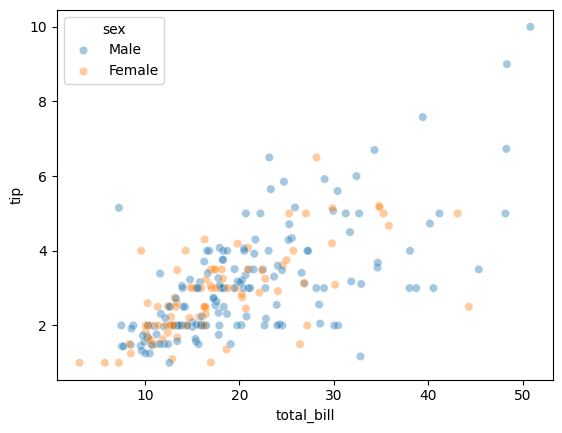

In [86]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.4)
plt.show()

연습문제 2. tip ~ total_bill 산점도. marker의 색깔은 성별에 따라서, marker의 크기는 인원수(size)에 따라서 다르게 시각화.

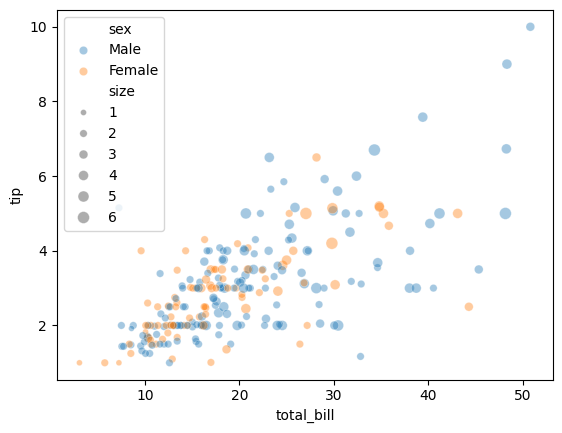

In [88]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size', alpha=0.4)
plt.show()

연습문제 3. tip ~ total_bill 산점도. marker의 색깔은 성별에 따라서, marker의 모양은 흡연여부에 따라서 다르게 시각화.

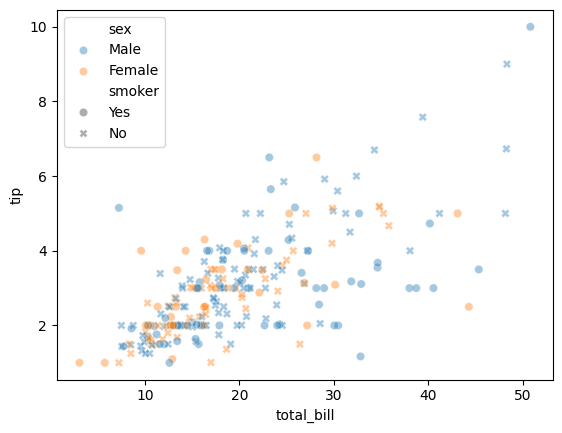

In [89]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='smoker', alpha=0.4)
plt.show()

# Line Plot(선 그래프)

In [95]:
np.random.seed(42)
df = pd.DataFrame(data={'day': np.arange(1, 11),
                        'price': np.random.rand(10)})
df

,day,price
0,1,0.374540
1,2,0.950714
2,3,0.731994
3,4,0.598658
4,5,0.156019
5,6,0.155995
6,7,0.058084
7,8,0.866176
8,9,0.601115
9,10,0.708073


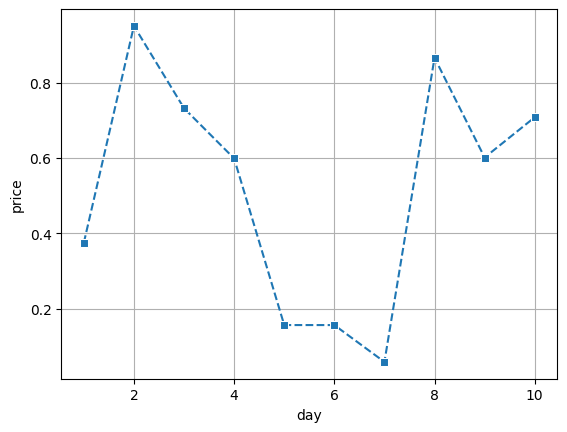

In [110]:
sns.lineplot(data=df, x='day', y='price', marker='s', linestyle='--')
plt.grid()
plt.show()

# Category Plot

카테고리(범주) 별로 subplot을 생성하고, 변수의 통계값을 모든 subplot에 같은 종류의 그래프로 시각화

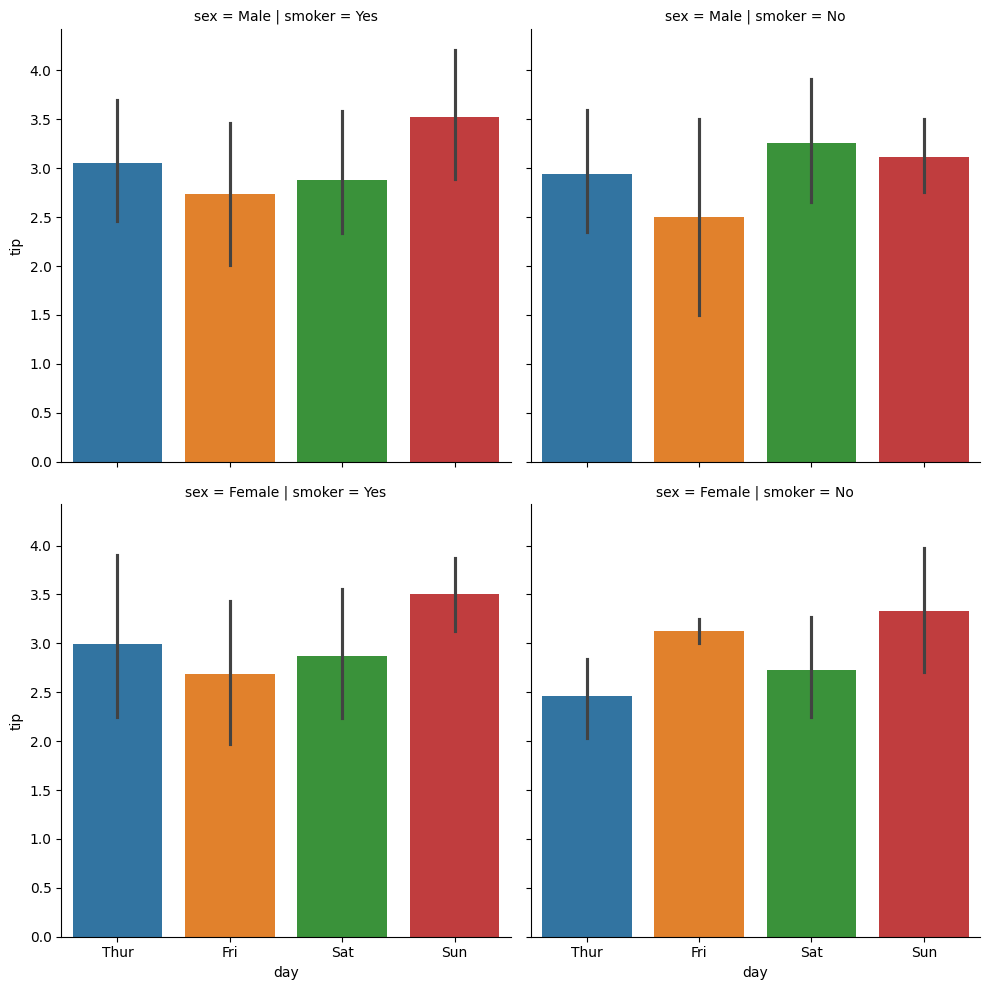

In [112]:
# 요일별(x축), 팁의 평균(y축) 막대 그래프.
# 성별(subplot의 row), 흡연 여부(subplot의 column)로 subplot들을 구분.
sns.catplot(data=tips, x='day', y='tip', hue='day',
            kind='bar',    # kind=그래프 종류
            row='sex',     # row=subplot의 행을 나누는 기준(범주)
            col='smoker')  # col=subpolt의 열을 나누는 기준(범주)
plt.show()

In [113]:
tips.groupby(by=['sex', 'smoker', 'day']).tip.mean()

<ipython-input-113-6eb27b0ac837>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'smoker', 'day']).tip.mean()


sex     smoker  day 
Male    Yes     Thur    3.058000
                Fri     2.741250
                Sat     2.879259
                Sun     3.521333
        No      Thur    2.941500
                Fri     2.500000
                Sat     3.256563
                Sun     3.115349
Female  Yes     Thur    2.990000
                Fri     2.682857
                Sat     2.868667
                Sun     3.500000
        No      Thur    2.459600
                Fri     3.125000
                Sat     2.724615
                Sun     3.329286
Name: tip, dtype: float64

연습문제 1. tips 데이터셋에서 요일별 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성.

연습문제 2. tips 데이터셋에서 요일별, 성별 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성.

연습문제 3. tips 데이터셋에서 요일별 팁의 box plot. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성.